# **MLP for Classification** 

In [1]:
# Building an Image Classifier Using the Sequential API
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Using Keras to load the dataset
# Every image is represented as a 28 × 28 array 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print("X_train shape = ",X_train.shape," X_test shape = ",X_test.shape)


X_train shape =  (60000, 28, 28)  X_test shape =  (10000, 28, 28)


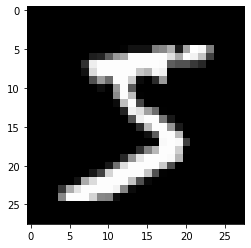

In [5]:
plt.imshow(X_train [0], cmap="gray")

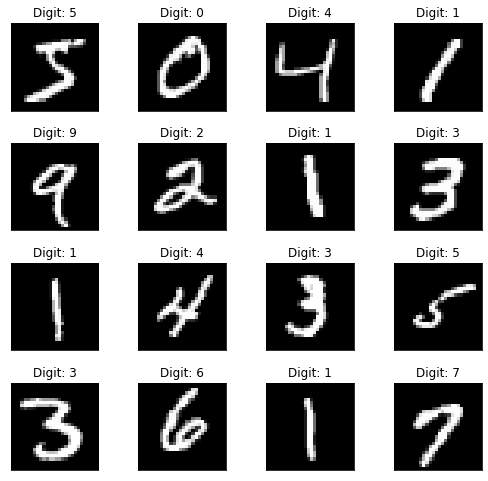

In [2]:
fig = plt.figure(figsize=(7,7))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap="gray", interpolation="none")
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])


In [6]:
# Scale the pixel intensities down to the [0,1] range by dividing them by 255.0 
# (this also converts them to floats).
X_train = X_train / 255.0
X_test  = X_test / 255.0


In [4]:
# Creating the model using the Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# The model’s summary() method displays all the model’s layers
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 271,160
Trainable params: 271,160
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", 
               metrics=["accuracy", tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5)])

# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
750/750 [==============================] - 5s 5ms/step - loss: 0.9485 - accuracy: 0.7408 - sparse_top_k_categorical_accuracy: 0.9548 - val_loss: 0.3989 - val_accuracy: 0.8909 - val_sparse_top_k_categorical_accuracy: 0.9908
Epoch 2/20
750/750 [==============================] - 4s 6ms/step - loss: 0.3632 - accuracy: 0.8970 - sparse_top_k_categorical_accuracy: 0.9930 - val_loss: 0.2996 - val_accuracy: 0.9138 - val_sparse_top_k_categorical_accuracy: 0.9937
Epoch 3/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2911 - accuracy: 0.9165 - sparse_top_k_categorical_accuracy: 0.9952 - val_loss: 0.2519 - val_accuracy: 0.9290 - val_sparse_top_k_categorical_accuracy: 0.9952
Epoch 4/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2498 - accuracy: 0.9275 - sparse_top_k_categorical_accuracy: 0.9962 - val_loss: 0.2264 - val_accuracy: 0.9334 - val_sparse_top_k_categorical_accuracy: 0.9959
Epoch 5/20
750/750 [==============================] - 4s 6ms/ste

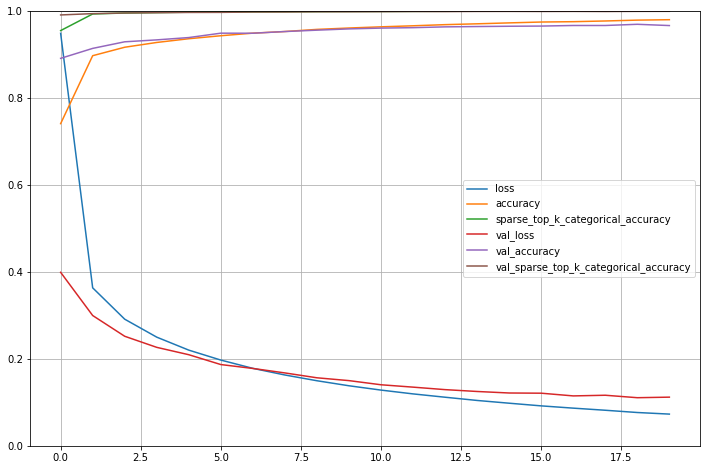

-----------------------------------------------------------------------
313/313 [==============================] - 1s 4ms/step - loss: 0.1019 - accuracy: 0.9683 - sparse_top_k_categorical_accuracy: 0.9989
Loss                       :  0.10188942402601242
accuracy                   :  0.9682999849319458
Top 5 Categorical Accuracy :  0.9988999962806702


In [6]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

print("-----------------------------------------------------------------------")
# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss                       : ",model_evaluate[0])
print("accuracy                   : ",model_evaluate[1])
print("Top 5 Categorical Accuracy : ",model_evaluate[2])


Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.95      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.94      0.97      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion matrix : 



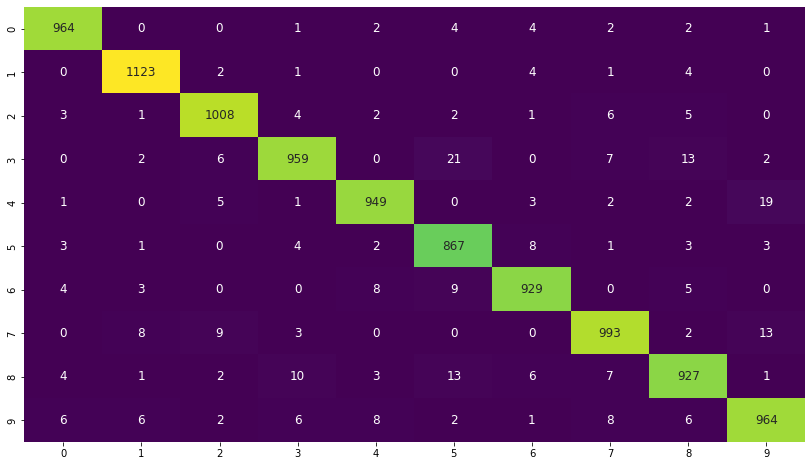

Normalized confusion matrix : 



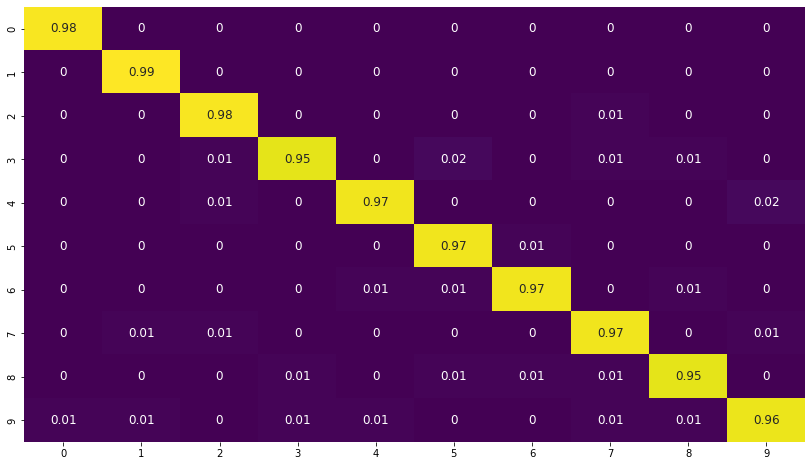

In [7]:
# Confusion Matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)

class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
    conf_matx = confusion_matrix(true, preds, normalize = normalize)
    conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

    plt.subplots(figsize=(14,8))
    sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
    plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred, "true")


In [8]:
# Make predictions
# predicted = model.predict(X_new)

# Save and Load Your Model
model.save("my_model.h5")

# Loading the model:
# my_model = keras.models.load_model("my_model.h5")
